In [11]:
import pathlib
import torch
import numpy as np
import argparse
import singleNeuron
import sv_utils

In [8]:
Sin = np.load('./spike_trains/' + str(seed) + '/' + str(seed) + 'sin.pt')
print(Sin)

In [22]:
seed = 1
N_in = 2000
N_out = 1
T = 120000
th = 490  # Threshold de la neurona
a_plus = 0.004525
a_minus = 0.00865625
pat_len = 50  # longitud del patron

# Realizamos el entrenamiento STDP
pop1 = singleNeuron.STDPLIFDensePopulation(in_channels=N_in, out_channels=N_out,
                                           weight=0.475, alpha=float(np.exp(-1e-3 / 10e-3)),
                                           beta=float(np.exp(-1e-3 / 2e-5)), delay=0,
                                           th=th,
                                           a_plus=a_plus, a_minus=a_minus,
                                           w_max=1.)

# Pre-procesamos PSpikes y NSpikes
dt_ltp = pat_len / 2  # Cantidad de timesteps que miro hacia atras
dt_ltd = pat_len * 3  # Cantidad de timesteps que miro hacia delante
PSpikes = torch.load('./spike_trains/' + str(seed) + '/' + str(seed) + 'pSpikes.pt')
NSpikes = torch.load('./spike_trains/' + str(seed) + '/' + str(seed) + 'nSpikes.pt')

Sin = torch.load('./spike_trains/' + str(seed) + '/' + str(seed) + 'sin.pt')

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])
for n in range(T):
    state = pop1.forward(Sin[n].unsqueeze(0), PSpikes[n], NSpikes[n - 1])
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    w_end = pop1.fc_layer.weight.data[0].detach().numpy()
    if n % 5000 == 0:
        c_l = sum(w_end * (1 - w_end)) / len(w_end)
        print(str(c_l))


# Realizamos el testing
# Pre-procesamos PSpikes y NSpikes
dt_ltp = pat_len / 2  # Cantidad de timesteps que miro hacia atras
dt_ltd = pat_len * 3  # Cantidad de timesteps que miro hacia delante
PSpikes_test = torch.load("./spike_trains/" + str(seed) + '/' + str(seed) + 'pSpikes_test.pt')
NSpikes_test = torch.load("./spike_trains/" + str(seed) + '/' + str(seed) + 'nSpikes_test.pt')

Sin_test = torch.load("./spike_trains/" + str(seed) + '/' + str(seed) + 'sin_test.pt')
pat_times_test = torch.load("./spike_trains/" + str(seed) + '/' + str(seed) + 'pat_times_test.pt')

# Realizamos el entrenamiento STDP
Uprobe_t = np.empty([T, N_out])
Iprobe_t = np.empty([T, N_out])
Sprobe_t = np.empty([T, N_out])
for n in range(T):
    state = pop1.forward_no_learning(Sin_test[n].unsqueeze(0))
    Uprobe_t[n] = state.U.data.numpy()
    Iprobe_t[n] = state.I.data.numpy()
    Sprobe_t[n] = state.S.data.numpy()


# Corremos metricas de testing
accuracy, precision, recall, f1, fake_alarms, missed_alarms = singleNeuron.get_metrics_long_pat(T, pat_times_test, Sprobe_t, pat_len)
metrics = np.array([accuracy, precision, recall, f1, fake_alarms, missed_alarms], dtype=float)
#pathlib.Path("./spike_trains/" + str(seed)).mkdir(parents=True, exist_ok=True)
#np.save("./spike_trains/" + str(seed) + 'metrics_test.npy', metrics)

print("accuracy: " + str(accuracy))
print("precision: " + str(precision))
print("recall: " + str(recall))
print("f1: " + str(f1))
print("fake_alarms: " + str(fake_alarms))
print("missed_alarms: " + str(missed_alarms))
print('  ')

0.24937498569488525
0.23983176859468222
0.23109018394351005
0.2225622118511237
0.2105902448890265
0.1978346906901279
0.18552765250181982
0.1797638317870442
0.17569731567416239
0.17163147341984586
0.16843141635952816
0.16363748951087473
0.15967580468469986
0.15474012428842251
0.1510431971397629
0.14686640808912965
0.14256954815120843
0.13853893220977442
0.13494150690571405
0.1301715498307167
0.1235194646879827
0.11602727175280779
0.10991913965468485
0.10384292208862098
accuracy: 0.9991666666666666
precision: 0.9904306220095693
recall: 1.0
f1: 0.9951923076923077
fake_alarms: 0.0009119927040583675
missed_alarms: 0.0
  


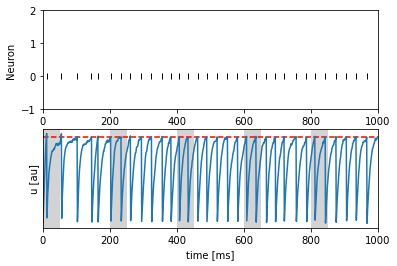

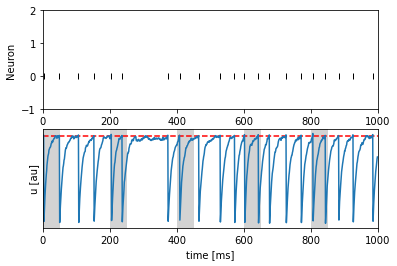

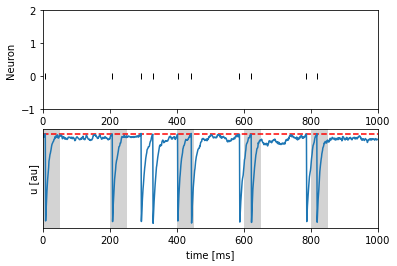

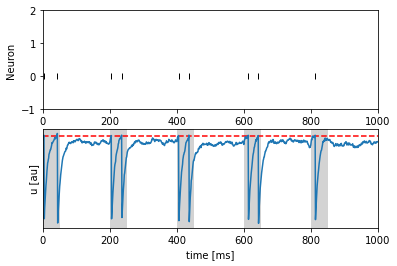

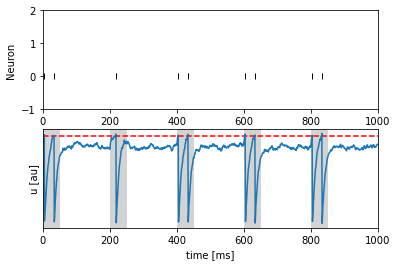

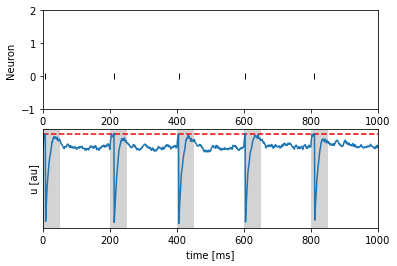

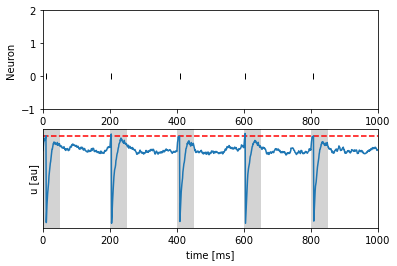

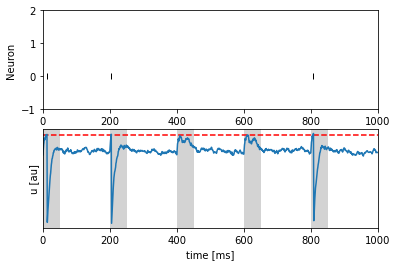

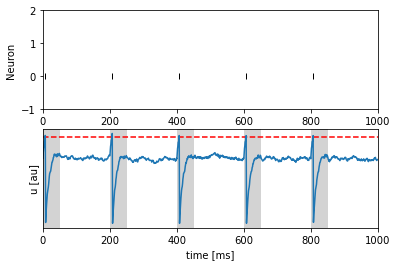

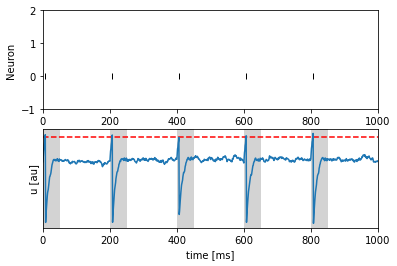

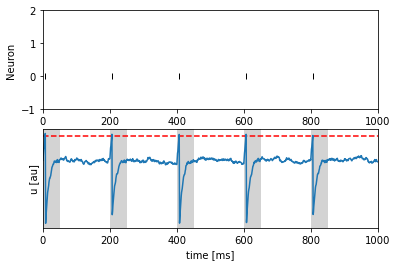

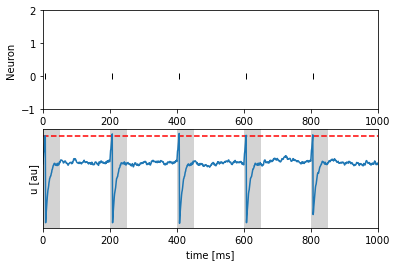

(<AxesSubplot:ylabel='Neuron '>,
 <AxesSubplot:xlabel='time [ms]', ylabel='u [au]'>)

In [18]:
pat_times = torch.load("./spike_trains/" + str(seed) + '/' + str(seed) + 'pat_times.pt')

sv_utils.plotLIF(U=Uprobe[0:1000], S=Sprobe[0:1000], pat_times=pat_times[0:1000], th=th)
sv_utils.plotLIF(U=Uprobe[5000:6000], S=Sprobe[5000:6000], pat_times=pat_times[5000:6000], th=th)
sv_utils.plotLIF(U=Uprobe[10000:11000], S=Sprobe[10000:11000], pat_times=pat_times[10000:11000], th=th)
sv_utils.plotLIF(U=Uprobe[19000:20000], S=Sprobe[19000:20000], pat_times=pat_times[19000:20000], th=th)
sv_utils.plotLIF(U=Uprobe[29000:30000], S=Sprobe[29000:30000], pat_times=pat_times[29000:30000], th=th)
sv_utils.plotLIF(U=Uprobe[39000:40000], S=Sprobe[39000:40000], pat_times=pat_times[39000:40000], th=th)
sv_utils.plotLIF(U=Uprobe[49000:50000], S=Sprobe[49000:50000], pat_times=pat_times[49000:50000], th=th)
sv_utils.plotLIF(U=Uprobe[59000:60000], S=Sprobe[59000:60000], pat_times=pat_times[59000:60000], th=th)
sv_utils.plotLIF(U=Uprobe[89000:90000], S=Sprobe[89000:90000], pat_times=pat_times[89000:90000], th=th)
sv_utils.plotLIF(U=Uprobe[99000:100000], S=Sprobe[99000:100000], pat_times=pat_times[99000:100000], th=th)
sv_utils.plotLIF(U=Uprobe[109000:110000], S=Sprobe[109000:110000], pat_times=pat_times[109000:110000], th=th)
sv_utils.plotLIF(U=Uprobe[119000:120000], S=Sprobe[119000:120000], pat_times=pat_times[119000:120000], th=th)

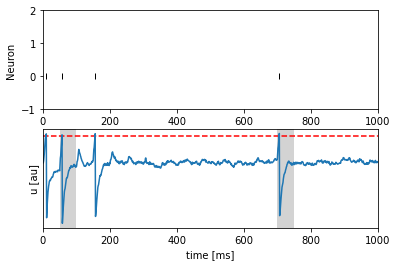

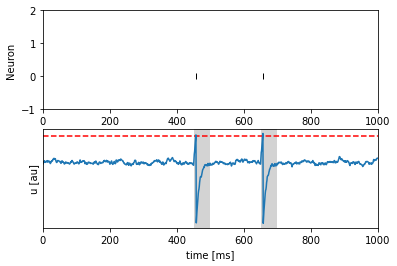

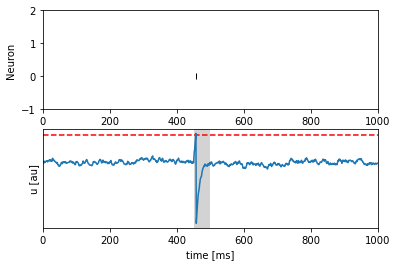

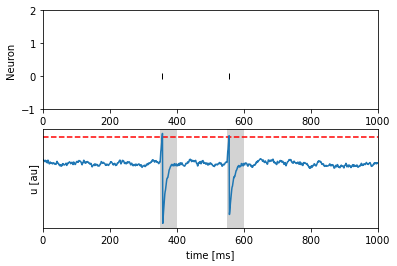

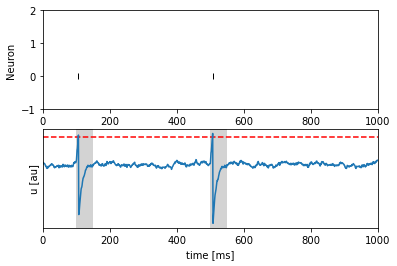

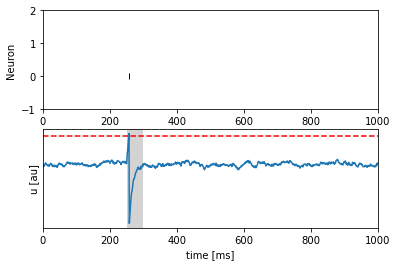

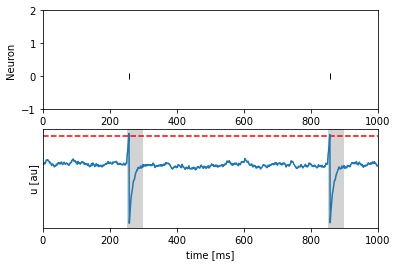

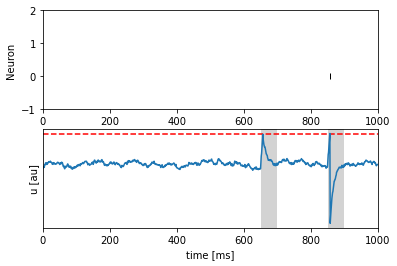

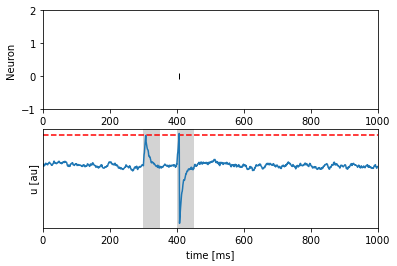

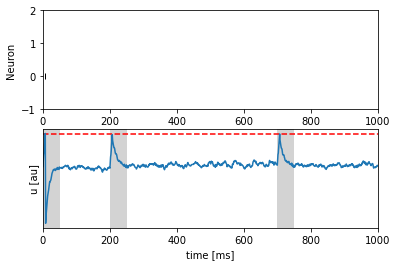

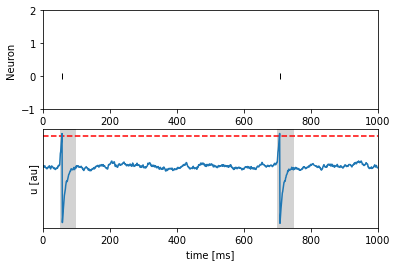

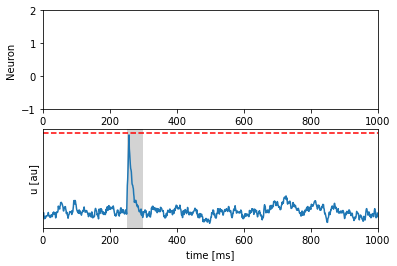

(<AxesSubplot:ylabel='Neuron '>,
 <AxesSubplot:xlabel='time [ms]', ylabel='u [au]'>)

In [20]:
sv_utils.plotLIF(U=Uprobe_t[0:1000], S=Sprobe_t[0:1000], pat_times=pat_times_test[0:1000], th=th)
sv_utils.plotLIF(U=Uprobe_t[5000:6000], S=Sprobe_t[5000:6000], pat_times=pat_times_test[5000:6000], th=th)
sv_utils.plotLIF(U=Uprobe_t[10000:11000], S=Sprobe_t[10000:11000], pat_times=pat_times_test[10000:11000], th=th)
sv_utils.plotLIF(U=Uprobe_t[19000:20000], S=Sprobe_t[19000:20000], pat_times=pat_times_test[19000:20000], th=th)
sv_utils.plotLIF(U=Uprobe_t[29000:30000], S=Sprobe_t[29000:30000], pat_times=pat_times_test[29000:30000], th=th)
sv_utils.plotLIF(U=Uprobe_t[39000:40000], S=Sprobe_t[39000:40000], pat_times=pat_times_test[39000:40000], th=th)
sv_utils.plotLIF(U=Uprobe_t[49000:50000], S=Sprobe_t[49000:50000], pat_times=pat_times_test[49000:50000], th=th)
sv_utils.plotLIF(U=Uprobe_t[59000:60000], S=Sprobe_t[59000:60000], pat_times=pat_times_test[59000:60000], th=th)
sv_utils.plotLIF(U=Uprobe_t[89000:90000], S=Sprobe_t[89000:90000], pat_times=pat_times_test[89000:90000], th=th)
sv_utils.plotLIF(U=Uprobe_t[99000:100000], S=Sprobe_t[99000:100000], pat_times=pat_times_test[99000:100000], th=th)
sv_utils.plotLIF(U=Uprobe_t[109000:110000], S=Sprobe_t[109000:110000], pat_times=pat_times_test[109000:110000], th=th)
sv_utils.plotLIF(U=Uprobe_t[119000:120000], S=Sprobe_t[119000:120000], pat_times=pat_times_test[119000:120000], th=th)

In [33]:
for th in [450, 460, 470, 490, 500, 520, 540]:
    accuracy = 0.
    precision = 0.
    recall = 0.
    f1 = 0.
    fake_alarms = 0.
    missed_alarms = 0.
    for seed in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        metrics = np.load('./spike_trains/' + str(seed) + '/metrics_test_' + str(th) + '.0.npy')
        accuracy += metrics[0]
        precision += metrics[1]
        recall += metrics[2]
        f1 += metrics[3]
        fake_alarms += metrics[4]
        missed_alarms += metrics[5]
        #print("accuracy: " + str(metrics[0]))
        #print("precision: " + str(metrics[1]))
        #print("recall: " + str(metrics[2]))
        #print("f1: " + str(metrics[3]))
        #print("fake_alarms: " + str(metrics[4]))
        #print("missed_alarms: " + str(metrics[5]))
        #print('  ')
    accuracy /= 15
    precision /= 15
    recall /= 15
    f1 /= 15
    fake_alarms /= 15
    missed_alarms /= 15
    print("------------- Promedio " + str(th) + " -------------")
    print(str(round(accuracy, 3)) + ' & ' + str(round(precision,3)) + ' & ' + str(round(recall,3)) + ' & ' + str(round(f1,3)) + ' & ' + str(round(fake_alarms, 3)) + ' & ' + str(round(missed_alarms,3)))
    print('  ')

------------- Promedio 450 -------------
0.992 & 0.928 & 1.0 & 0.96 & 0.009 & 0.0
  
------------- Promedio 460 -------------
0.995 & 0.953 & 1.0 & 0.976 & 0.005 & 0.0
  
------------- Promedio 470 -------------
0.995 & 0.96 & 0.991 & 0.975 & 0.004 & 0.009
  
------------- Promedio 490 -------------
0.995 & 0.97 & 0.977 & 0.973 & 0.003 & 0.023
  
------------- Promedio 500 -------------
0.992 & 0.975 & 0.935 & 0.95 & 0.002 & 0.065
  
------------- Promedio 520 -------------
0.992 & 0.978 & 0.935 & 0.955 & 0.002 & 0.065
  
------------- Promedio 540 -------------
0.975 & 0.972 & 0.741 & 0.804 & 0.002 & 0.259
  
